![image.png](attachment:image.png)

## 릿지 회귀(Ridge Regression)

- L2-norm 패널티를 더한 선형회귀 model
  - 기존 선형 모델에 규제항을 추가해 overfitting을 해결
- 가중치(회귀계수)의 절대값 규제(regularization)하여 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 한다.
- 릿지 회귀는 회귀계수를 0에 가깝게하지만 0으로 만들지 않음(이미지 참고)

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  - $\alpha$: 사용자가 지정하는 매개변수
  - $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐
  - $\alpha$가 없으면 일반적인 선형 회귀와 같다.

__참고__ 
- 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
  - 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생

### 보스턴 주택 가격에 대한 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn.datasets import load_boston
import pandas

!wget https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv
boston_df = pandas.read_csv("boston.csv")
del boston_df["Unnamed: 0"]

x = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1:]

# x, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

--2022-12-21 10:50:39--  https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41084 (40K) [text/plain]
Saving to: ‘boston.csv’

boston.csv          100%[===================>]  40.12K  --.-KB/s    in 0.002s  

2022-12-21 10:50:39 (17.5 MB/s) - ‘boston.csv’ saved [41084/41084]



In [ ]:
# x, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
model = Ridge(alpha = 0.2)
model.fit(x_train, y_train)

Ridge(alpha=0.2)

In [ ]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.7498571473812008
Test Data Score: 0.6976919918362727


In [ ]:
import matplotlib.pyplot as plt
def plot_boston_price(expected, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  plt.plot([5, 50], [5, 50], '--r') 
  plt.xlabel('True price ($1,000s)')
  plt.ylabel('Predicted price ($1,000s)')
  plt.tight_layout()

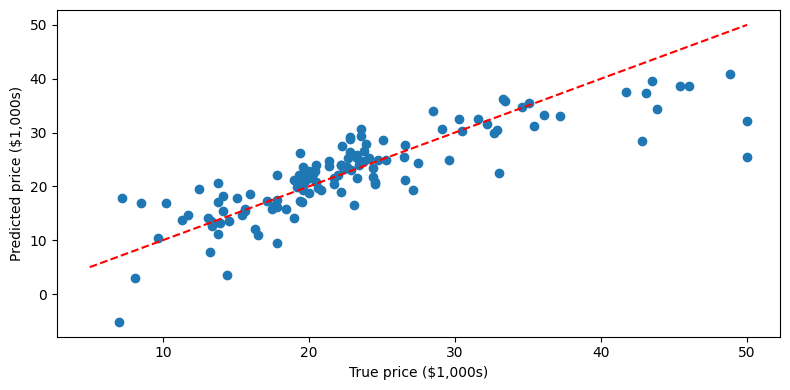

In [ ]:
x_test_predict = model.predict(x_test)
plot_boston_price(y_test, x_test_predict)

### 캘리포니아 주택 가격에 대한 릿지 회귀
- alpha 값을 0.1, 0.2, 0.3, 0.4, 0.5 까지 작성하여 비교해 보세요 
- alpha 가 너무 작으면 overfitting, 너무 크면  underfitting 발생

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
california = fetch_california_housing()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)
model = Ridge(alpha = 0.2)
model.fit(x_train, y_train)

Ridge(alpha=0.2)

In [ ]:
model.alpha

0.2

In [ ]:
import numpy as np

In [ ]:
models = [Ridge(alpha = round(i, 1)) for i in np.arange(0, 1, 0.1)]
trained_models = [] 

for model in models:
    model.fit(x_train, y_train)
    print(f"alpha : {model.alpha}", f'Train Data Score: {model.score(x_train, y_train)}' , f'Test Data Score: {model.score(x_test, y_test)}')
    trained_models.append(model)

alpha : 0.0 Train Data Score: 0.6027059456540118 Test Data Score: 0.6194795898543448
alpha : 0.1 Train Data Score: 0.6027059452997251 Test Data Score: 0.6194786008788464
alpha : 0.2 Train Data Score: 0.6027059442373421 Test Data Score: 0.6194776117711673
alpha : 0.3 Train Data Score: 0.6027059424675777 Test Data Score: 0.619476622531599
alpha : 0.4 Train Data Score: 0.602705939991146 Test Data Score: 0.619475633160433
alpha : 0.5 Train Data Score: 0.6027059368087601 Test Data Score: 0.6194746436579601
alpha : 0.6 Train Data Score: 0.6027059329211326 Test Data Score: 0.6194736540244715
alpha : 0.7 Train Data Score: 0.6027059283289753 Test Data Score: 0.6194726642602564
alpha : 0.8 Train Data Score: 0.602705923032999 Test Data Score: 0.619471674365605
alpha : 0.9 Train Data Score: 0.602705917033914 Test Data Score: 0.6194706843408068


In [ ]:
# LinearRegression 에 대한 결과
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.6027059456540118
Test Data Score: 0.6194795898543435


In [ ]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize = (8, 4))
  plt.scatter(expected, predicted)
  plt.plot([0, 5], [0, 5], '--r') 
  plt.xlabel('True price ($100,000s)')
  plt.ylabel('Predicted pirce ($100,000s)')
  plt.tight_layout()

## 라쏘 회귀(Lasso Regression)
- L1-norm 패널티를 더한 선형회귀 model
- 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
- 불필요한 회귀계수를 급격하게 감소시켜 0으로 만들고 제거(이미지 참고)
    - model 을 단순하게 만들어 overfitting 을 방지 한다. 

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

- 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

### 보스턴 주택 가격에 대한 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# from sklearn.datasets import load_boston
import pandas

!wget https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv -O boston.csv
boston_df = pandas.read_csv("boston.csv")
del boston_df["Unnamed: 0"]

x = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1:]

# x, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

--2022-12-21 10:57:00--  https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41084 (40K) [text/plain]
Saving to: ‘boston.csv’

boston.csv          100%[===================>]  40.12K  --.-KB/s    in 0.001s  

2022-12-21 10:57:00 (44.7 MB/s) - ‘boston.csv’ saved [41084/41084]



In [ ]:
model = Lasso(alpha = 0.1)
# model = Lasso(alpha = 0.01)
# model = Lasso(alpha = 0.001)
model.fit(x_train, y_train)

Lasso(alpha=0.1)

In [ ]:
models = [Lasso(alpha = round(0.1**i, 3)) for i in np.arange(0, 4)]
trained_models = [] 

for model in models:
    model.fit(x_train, y_train)
    print(f"alpha : {model.alpha}", f'Train Data Score: {model.score(x_train, y_train)}' , f'Test Data Score: {model.score(x_test, y_test)}')
    trained_models.append(model)

alpha : 1.0 Train Data Score: 0.29075167035569627 Test Data Score: 0.2856391060945035
alpha : 0.1 Train Data Score: 0.5482975729196293 Test Data Score: 0.5304075054197133
alpha : 0.01 Train Data Score: 0.6049758088941315 Test Data Score: 0.5892204618329687
alpha : 0.001 Train Data Score: 0.6086735743503 Test Data Score: 0.5949817877732055


In [ ]:
print(f'Train Data Score: {trained_models[3].score(x_train, y_train)}')
print(f'Test Data Score: {trained_models[3].score(x_test, y_test)}')

Train Data Score: 0.6086735743503
Test Data Score: 0.5949817877732055


In [ ]:
x_test_predict = trained_models[3].predict(x_test)

(y_test, x_test_predict)

(array([2.601, 2.736, 2.135, ..., 0.947, 2.148, 3.231]),
 array([2.37951735, 2.61177349, 2.43904396, ..., 0.79395388, 2.32510508,
        1.98002756]))

### 캘리포니아 주택 가격에 대한 라쏘 회귀

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)

In [ ]:
models = [Lasso(alpha = round(0.1**i, 3)) for i in np.arange(0, 4)]
trained_models = [] 

for model in models:
    model.fit(x_train, y_train)
    print(f"alpha : {model.alpha}", f'Train Data Score: {model.score(x_train, y_train)}' , f'Test Data Score: {model.score(x_test, y_test)}')
    trained_models.append(model)

alpha : 1.0 Train Data Score: 0.28701064773403895 Test Data Score: 0.2837135232624509
alpha : 0.1 Train Data Score: 0.5423454123925491 Test Data Score: 0.5490773987967961
alpha : 0.01 Train Data Score: 0.5990026173791605 Test Data Score: 0.6126802436693182
alpha : 0.001 Train Data Score: 0.6026990989717411 Test Data Score: 0.6194702947534714


In [ ]:
print(f'Train Data Score: {trained_models[3].score(x_train, y_train)}')
print(f'Test Data Score: {trained_models[3].score(x_test, y_test)}')

Train Data Score: 0.6026990989717411
Test Data Score: 0.6194702947534714


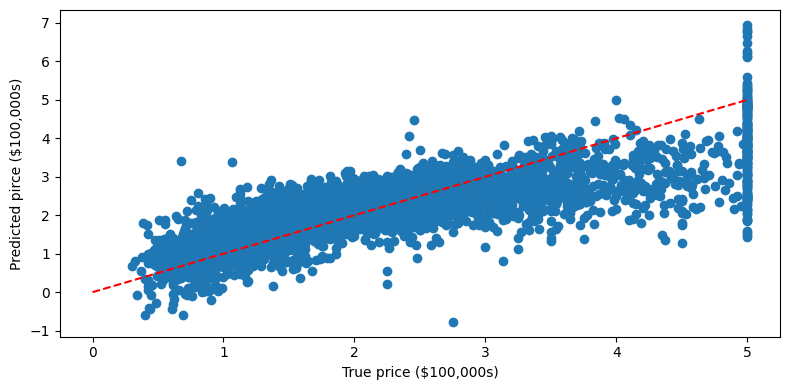

In [ ]:
x_test_predict = trained_models[3].predict(x_test)
plot_california_prices(y_test, x_test_predict)

## 신축망 (Elastic-Net)

- 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델. 
- 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 준다.

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

- $\alpha$: 규제의 강도를 조절하는 매개변수
- $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 보스턴 주택 가격에 대한 신축망

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# from sklearn.datasets import load_boston
import pandas

!wget https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv -O boston.csv
boston_df = pandas.read_csv("boston.csv")
del boston_df["Unnamed: 0"]

x = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1:]

# x, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

--2022-12-21 10:59:28--  https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41084 (40K) [text/plain]
Saving to: ‘boston.csv’

boston.csv          100%[===================>]  40.12K  --.-KB/s    in 0.001s  

2022-12-21 10:59:28 (42.7 MB/s) - ‘boston.csv’ saved [41084/41084]



In [ ]:
model = ElasticNet(alpha=0.001, l1_ratio=0.5)
model.fit(x_train, y_train)

ElasticNet(alpha=0.001)

In [ ]:
model.l1_ratio

0.5

In [ ]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.723893759453932
Test Data Score: 0.7680947844313235


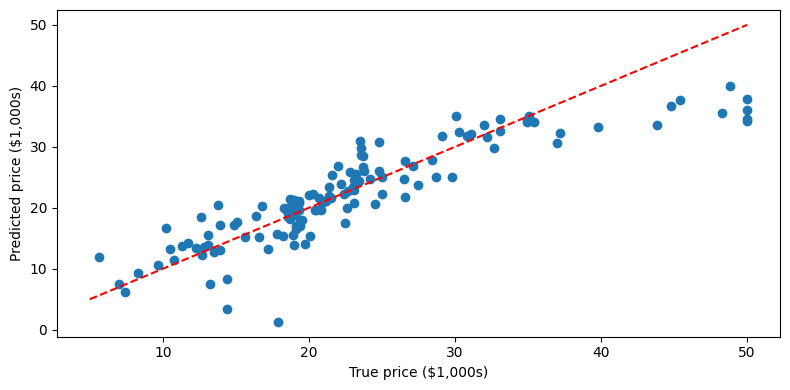

In [ ]:
x_test_predict = model.predict(x_test)
plot_boston_price(y_test, x_test_predict)

### 캘리포니아 주택 가격에 대한 신축망

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)

In [ ]:
model = ElasticNet()

In [ ]:
model.alpha

1.0

In [ ]:
model.l1_ratio

0.5

In [ ]:
models = [ElasticNet(alpha = round(0.1**i, 3), l1_ratio=0.5) for i in np.arange(0, 4)]

# models = []
# for i in  np.arange(0, 4, 1):
#     model = ElasticNet()
#     model.alpha = round(0.1**i, 3)
#     for j in np.arange(0.1, 0.9, 0.1):
#         model.l1_ratio = round(j, 1)
#         models.append(model)


trained_models = [] 

for model in models:
    model.fit(x_train, y_train)
    print(f"alpha : {model.alpha}, l1_ratio : {model.l1_ratio}", f'Train Data Score: {model.score(x_train, y_train)}' , f'Test Data Score: {model.score(x_test, y_test)}')
    trained_models.append(model)

alpha : 1.0, l1_ratio : 0.5 Train Data Score: 0.4225139395039168 Test Data Score: 0.42798699861114164
alpha : 0.1, l1_ratio : 0.5 Train Data Score: 0.5746270412918129 Test Data Score: 0.5811700658050447
alpha : 0.01, l1_ratio : 0.5 Train Data Score: 0.6029428526702008 Test Data Score: 0.6100995804809572
alpha : 0.001, l1_ratio : 0.5 Train Data Score: 0.6046263058303194 Test Data Score: 0.6124429325293752


In [ ]:
np.arange(0.1, 0.9, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

In [ ]:
id(models[0])

140445876448240

In [ ]:
id(models[1])

140445876448240

In [ ]:
id(models[7])

140445876448240